In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
data_df = pd.read_csv("FB.csv")
data_df.head(10)

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0
5,246675545449582_1645650162218773,217,6,0,211,5,1,0,0,0,0,1,0
6,246675545449582_1645564175560705,503,614,72,418,70,10,2,0,3,0,0,0
7,246675545449582_1644824665634656,295,453,53,260,32,1,1,0,1,0,0,0
8,246675545449582_1644655795651543,203,1,0,198,5,0,0,0,0,0,1,0
9,246675545449582_1638788379571618,170,9,1,167,3,0,0,0,0,0,1,0


In [127]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
 10  status_link    7050 non-null   int64 
 11  status_photo   7050 non-null   int64 
 12  status_status  7050 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 716.1+ KB


In [6]:
data_df.shape

(7050, 13)

In [8]:
data_df.dtypes

status_id        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
status_link       int64
status_photo      int64
status_status     int64
dtype: object

In [10]:
data_df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,0.008936,0.608227,0.051773
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,0.094115,0.488181,0.221584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000,1.000000


In [13]:
data_df.duplicated().sum()

53

In [128]:
data_df.drop_duplicates(inplace=True)
data_df.corr(method='pearson')


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
num_reactions,1.000000,0.156218,0.259680,0.994672,0.310690,0.261717,0.179681,0.082112,0.136084,0.030557,-0.144434,0.111832
num_comments,0.156218,1.000000,0.640528,0.105964,0.521310,0.163498,0.325056,0.257537,0.239549,-0.023479,-0.292059,-0.049279
num_shares,0.259680,0.640528,1.000000,0.179705,0.820279,0.409797,0.399855,0.218618,0.332347,-0.025894,-0.354980,-0.066380
num_likes,0.994672,0.105964,0.179705,1.000000,0.212760,0.200039,0.123154,0.057129,0.096298,0.034635,-0.112900,0.121497
num_loves,0.310690,0.521310,0.820279,0.212760,1.000000,0.510144,0.507892,0.226564,0.394810,-0.029596,-0.352689,-0.065089
num_wows,0.261717,0.163498,0.409797,0.200039,0.510144,1.000000,0.288463,0.091419,0.191667,-0.011609,-0.090285,-0.001998
num_hahas,0.179681,0.325056,0.399855,0.123154,0.507892,0.288463,1.000000,0.154029,0.225077,-0.015996,-0.159739,-0.034360
num_sads,0.082112,0.257537,0.218618,0.057129,0.226564,0.091419,0.154029,1.000000,0.143704,-0.014973,-0.089065,0.018574
num_angrys,0.136084,0.239549,0.332347,0.096298,0.394810,0.191667,0.225077,0.143704,1.000000,-0.015252,-0.126767,-0.028746
status_link,0.030557,-0.023479,-0.025894,0.034635,-0.029596,-0.011609,-0.015996,-0.014973,-0.015252,1.000000,-0.118278,-0.022167


<AxesSubplot:>

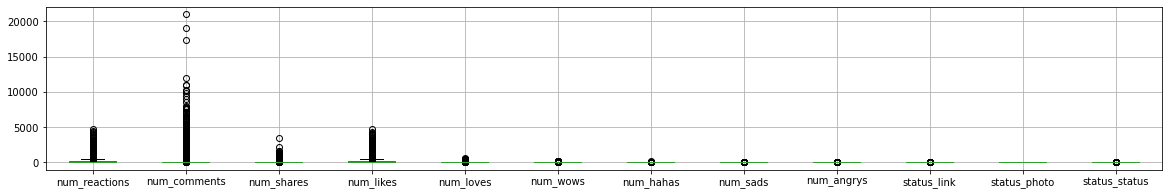

In [22]:
data_df.boxplot(figsize=(20,3))

In [46]:
data_df['status_status'].value_counts()

for i in data_df.columns:
    if i != 'status_id':
        print(pd.crosstab(data_df[i],data_df['status_status']).head(20))
        print('----------------------------------')

status_status    0  1
num_reactions        
0              121  0
1              131  0
2              124  0
3              115  1
4               77  1
5               91  3
6               65  2
7               75  1
8               84  1
9               81  1
10             100  1
11             105  1
12             112  0
13              92  3
14             120  1
15              94  2
16              93  0
17              85  0
18             110  1
19              94  3
----------------------------------
status_status     0   1
num_comments           
0              2065  54
1               544  20
2               343  18
3               293  15
4               239  10
5               201  10
6               170  17
7               139  12
8               125  11
9               119  13
10              109  13
11              109   7
12               77   8
13               73  10
14               68  10
15               52   6
16               53   8
17               46   5
1

In [131]:
data_new = data_df.drop(['status_id'], axis =1)
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.094957,-1.245993,-0.233666
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.094957,-1.245993,-0.233666
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666


In [135]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00014186  0.1508643   0.25075809  0.99506451  0.30504605  0.2677898
   0.17605301  0.07514867  0.1243437   0.02874721 -0.13153369  0.10541715]
 [ 0.1508643   1.00014186  0.64072829  0.10170146  0.52129743  0.16241703
   0.32509411  0.23648623  0.22521631 -0.02334367 -0.29188709 -0.04942026]
 [ 0.25075809  0.64072829  1.00014186  0.1725164   0.82011657  0.40768568
   0.39988229  0.19999833  0.31255689 -0.02571137 -0.35483022 -0.06653382]
 [ 0.99506451  0.10170146  0.1725164   1.00014186  0.20933778  0.20782924
   0.12080097  0.05217624  0.08744305  0.03266301 -0.10055153  0.11464773]
 [ 0.30504605  0.52129743  0.82011657  0.20933778  1.00014186  0.50887022
   0.50790168  0.20762964  0.3710539  -0.02952704 -0.35179053 -0.06529185]
 [ 0.2677898   0.16241703  0.40768568  0.20782924  0.50887022  1.00014186
   0.28779702  0.08651499  0.18311248 -0.01196935 -0.0864212  -0.00312953]
 [ 0.17605301  0.32509411  0.39988229  0.12080097  0.50790168  0.28779702
   1.000141

In [136]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.93630543e-01  6.06641137e-01  7.15773171e-01  2.03910032e-02
  -1.12002407e-01  4.82435866e-03  3.20850086e-02  2.42016415e-02
  -6.97861393e-02  8.52072210e-02  8.18911389e-02 -1.04601450e-03]
 [ 3.47497866e-01 -2.30746002e-01 -1.26384681e-06  1.67785969e-01
   8.75480006e-02 -5.17376834e-01 -5.15597556e-01 -3.99866919e-02
  -1.69312690e-01  4.37540439e-01  1.86287704e-01  1.59573424e-02]
 [ 4.43254435e-01 -2.04910484e-01  1.73179788e-05 -6.71346886e-01
   3.92859022e-03  4.57024584e-01 -1.12734594e-01 -2.04542894e-01
  -5.09397191e-02  1.96740735e-01 -6.98659821e-02 -3.48387949e-02]
 [ 2.51769604e-01  6.40653903e-01 -6.95423734e-01 -3.90502026e-02
  -1.05702016e-01 -2.79737958e-02  2.54206909e-02  3.28768718e-02
  -8.70489869e-02  9.66955499e-02  1.02090297e-01  1.73807760e-03]
 [ 4.61255079e-01 -1.65917245e-01 -6.18696218e-02  7.03643043e-01
  -5.18155502e-02  4.72074756e-01  7.92827429e-02 -8.44140094e-02
   3.53002915e-02  4.86999544e-03 -1.39427366e-01 -3.3

In [137]:
total=sum(eig_vals)
variance_exp=[i/total for i in sorted(eig_vals,reverse=True)]
print(variance_exp)
cum_sum_variance=np.cumsum(variance_exp)
print(cum_sum_variance)

[0.29964815721560745, 0.14871149419964869, 0.10424541935463384, 0.08506266275157276, 0.07959560707556225, 0.0707892607551931, 0.06765585521656405, 0.05796113974017217, 0.04405503301768336, 0.029903246047334398, 0.012372123252876574, 1.3731512208374497e-09]
[0.29964816 0.44835965 0.55260507 0.63766773 0.71726334 0.7880526
 0.85570846 0.9136696  0.95772463 0.98762788 1.         1.        ]


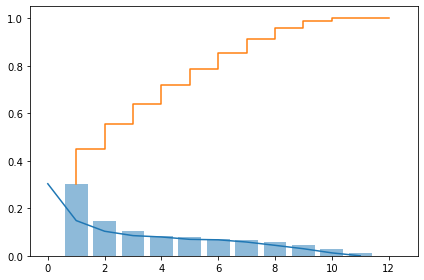

In [100]:
plt.plot(variance_exp)
plt.bar(range(1, eig_vals.size+1), variance_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size+1),cum_sum_variance)
plt.tight_layout()


In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 2.49500294, -0.80644199,  0.38778102, ..., -0.97231247,
        -0.46550736, -0.96536827],
       [-0.18957102,  0.00767383, -0.15966981, ..., -0.40295527,
         0.50925543, -0.35632615],
       [-0.42293659,  0.60872631, -0.62573078, ...,  0.53914638,
         0.70494912,  0.54524478],
       ...,
       [-0.07067992,  0.0319256 , -0.30187144, ..., -0.03160793,
         0.09656654, -0.02182985],
       [-0.76515049,  0.01663126, -0.40336141, ...,  0.07582711,
        -0.10224415,  0.06974368],
       [-0.06510389, -0.04240942,  0.14226483, ..., -0.09447845,
         0.03549011, -0.08823347]])

In [134]:
# pca.components_
pca.explained_variance_ratio_

array([0.29964816, 0.14871149, 0.10424542, 0.08506266, 0.07959561,
       0.07078926, 0.06765586])

In [116]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.294094,0.345960,0.440979,0.251625,0.458571,0.292249,0.306560,0.173732,0.247742,-0.001057,-0.233624,0.015049
1,0.602922,-0.227287,-0.200808,0.638190,-0.166324,0.003271,-0.140360,-0.118079,-0.129318,0.070746,0.013875,0.232330
2,0.131438,-0.097472,-0.006732,0.125699,0.050831,0.214862,0.100967,-0.065744,0.082026,-0.235672,0.642285,-0.647543
3,0.001853,-0.019716,0.028806,-0.000696,0.028857,0.030373,0.013221,-0.214024,-0.019045,0.903753,-0.067855,-0.359591
4,0.094684,0.243851,-0.049240,0.117620,-0.141744,-0.432608,-0.135621,0.786713,0.021754,0.147493,0.111893,-0.189773


<AxesSubplot:>

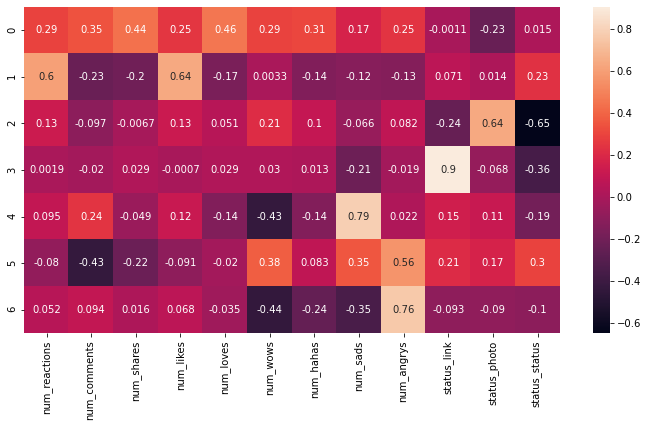

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,annot=True)